<i>ISSS606 Social Analytics & Applications<br>
School of Computing and Information Systems, Singapore Management University</i>

In [449]:
import networkx as nx
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## 1. Load Data and Data Cleaning

In [450]:
df1_original = pd.read_excel(r'C:\Users\SunnyM\Downloads\hp_script_combined.xlsx', sheet_name='hp_script_1')
df2_original = pd.read_excel(r'C:\Users\SunnyM\Downloads\hp_script_combined.xlsx', sheet_name='hp_script_2')
df3_original = pd.read_excel(r'C:\Users\SunnyM\Downloads\hp_script_combined.xlsx', sheet_name='hp_script_3')
df4_original = pd.read_excel(r'C:\Users\SunnyM\Downloads\hp_script_combined.xlsx', sheet_name='hp_script_4')
df5_original = pd.read_excel(r'C:\Users\SunnyM\Downloads\hp_script_combined.xlsx', sheet_name='hp_script_5')
df6_original = pd.read_excel(r'C:\Users\SunnyM\Downloads\hp_script_combined.xlsx', sheet_name='hp_script_6')
df7_original = pd.read_excel(r'C:\Users\SunnyM\Downloads\hp_script_combined.xlsx', sheet_name='hp_script_7')
df8_original = pd.read_excel(r'C:\Users\SunnyM\Downloads\hp_script_combined.xlsx', sheet_name='hp_script_8')

df1_original.info()
df2_original.info()
df3_original.info()
df4_original.info()
df5_original.info()
df6_original.info()
df7_original.info()
df8_original.info()

C:\Users\SunnyM\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\SunnyM\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\SunnyM\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\SunnyM\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\SunnyM\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\SunnyM\anaconda3\lib\site-packages\o

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Dialogue ID    914 non-null    int64 
 1   Movie ID       914 non-null    int64 
 2   Movie Chapter  914 non-null    int64 
 3   Node_X         914 non-null    object
 4   Node_Y         914 non-null    object
 5   Dialogue       914 non-null    object
dtypes: int64(3), object(3)
memory usage: 43.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Dialogue ID    986 non-null    int64 
 1   Movie ID       986 non-null    int64 
 2   Movie Chapter  986 non-null    int64 
 3   Node_X         986 non-null    object
 4   Node_Y         986 non-null    object
 5   Dialogue       986 non-null    object
dtypes: int64(3), object(3)
memory usage: 46.3+ KB
<c

C:\Users\SunnyM\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [451]:
#To consolidate all 8 movie dataframe into 1 single dataframe
df = pd.concat([df1_original,df2_original,df3_original,df4_original,df5_original,df6_original,df7_original,df8_original],ignore_index=True)
df

,Dialogue ID,Movie ID,Movie Chapter,Node_X,Node_Y,Dialogue
0,1,1,1,Albus Dumbledore,Minerva McGonagall,I should have known that you would be here...P...
1,2,1,1,Minerva McGonagall,Albus Dumbledore,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,1,Albus Dumbledore,Minerva McGonagall,"I'm afraid so, Professor. The good, and the bad."
3,4,1,1,Minerva McGonagall,Albus Dumbledore,And the boy?
4,5,1,1,Albus Dumbledore,Minerva McGonagall,Hagrid is bringing him.
...,...,...,...,...,...,...
7631,7440,8,26,Harry Potter,Albus Potter,Then Slytherin House will have gained a wonder...
7632,7441,8,26,Albus Potter,Harry Potter,Really?
7633,7442,8,26,Harry Potter,Albus Potter,Really.
7634,7443,8,26,Harry Potter,Albus Potter,Ready?


In [452]:
# to drop column 'Dialogue ID', and 'Movie Chapter'
df = df.drop(columns = ['Dialogue ID', 'Movie Chapter'], axis=1)

In [453]:
# to drop the rows where Node X = Node Y since we are not interested in self-loop
df = df[df['Node_X'] != df['Node_Y']]

In [454]:
# to drop the rows with empty Node_Y input
df= df.dropna()

In [455]:
# to drop the rows with nodes of unspecified people
drop_list = ['Students', 'Girl', 'All', 'Boy', 'Man', 'Other', 'Woman', 'Old man', 'Class', 'Student', 'Boy 2', 'Crowd']

df = df[~df.Node_X.isin(drop_list)]

df_dialogue = df[~df.Node_Y.isin(drop_list)]

df_dialogue

,Movie ID,Node_X,Node_Y,Dialogue
0,1,Albus Dumbledore,Minerva McGonagall,I should have known that you would be here...P...
1,1,Minerva McGonagall,Albus Dumbledore,"Good evening, Professor Dumbledore. Are the ru..."
2,1,Albus Dumbledore,Minerva McGonagall,"I'm afraid so, Professor. The good, and the bad."
3,1,Minerva McGonagall,Albus Dumbledore,And the boy?
4,1,Albus Dumbledore,Minerva McGonagall,Hagrid is bringing him.
...,...,...,...,...
7631,8,Harry Potter,Albus Potter,Then Slytherin House will have gained a wonder...
7632,8,Albus Potter,Harry Potter,Really?
7633,8,Harry Potter,Albus Potter,Really.
7634,8,Harry Potter,Albus Potter,Ready?


In [456]:
# we have the dialogue dataframe ready df_dialogue.
df_dialogue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6571 entries, 0 to 7635
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie ID  6571 non-null   int64 
 1   Node_X    6571 non-null   object
 2   Node_Y    6571 non-null   object
 3   Dialogue  6571 non-null   object
dtypes: int64(1), object(3)
memory usage: 256.7+ KB


In [457]:
# to create node pair and calculate weights for each pair
df_dialogue["Node_pair"] = df_dialogue["Node_X"] + "," + df_dialogue["Node_Y"] 
df_dialogue_gp = pd.DataFrame({'weight':df_dialogue.groupby(by = 'Movie ID')['Node_pair'].value_counts()}).reset_index()
df_dialogue_gp

C:\Users\SunnyM\AppData\Local\Temp\ipykernel_20820\3969785635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dialogue["Node_pair"] = df_dialogue["Node_X"] + "," + df_dialogue["Node_Y"]


,Movie ID,Node_pair,weight
0,1,"Ron Weasley,Harry Potter",76
1,1,"Harry Potter,Ron Weasley",74
2,1,"Rubeus Hagrid,Harry Potter",62
3,1,"Harry Potter,Rubeus Hagrid",45
4,1,"Hermione Granger,Harry Potter",42
...,...,...,...
1240,8,"Seamus Finnigan,Harry Potter",1
1241,8,"Seamus Finnigan,Ron Weasley",1
1242,8,"Sorting Hat,Neville Longbottom",1
1243,8,"Voldemort,Corban Yaxley",1


In [458]:
# to split the node pairs column into 2 columns. We have the nodes and weights data ready as df_graph.
df_graph = pd.DataFrame(df_dialogue_gp['Node_pair'].str.split(',',1).tolist(),
                                 columns = ['Node_X','Node_Y'])
df_graph = pd.concat([df_dialogue_gp['Movie ID'],df_graph,df_dialogue_gp['weight']], axis =1)
df_graph

,Movie ID,Node_X,Node_Y,weight
0,1,Ron Weasley,Harry Potter,76
1,1,Harry Potter,Ron Weasley,74
2,1,Rubeus Hagrid,Harry Potter,62
3,1,Harry Potter,Rubeus Hagrid,45
4,1,Hermione Granger,Harry Potter,42
...,...,...,...,...
1240,8,Seamus Finnigan,Harry Potter,1
1241,8,Seamus Finnigan,Ron Weasley,1
1242,8,Sorting Hat,Neville Longbottom,1
1243,8,Voldemort,Corban Yaxley,1


In [459]:
# to consolidate a nodes VS weights data for all the movies combined
df_graph_all_movies_gp = pd.DataFrame({'weight':df_dialogue_gp.groupby(by= 'Node_pair')['weight'].sum()}).reset_index()

df_graph_all_movies_gp

,Node_pair,weight
0,"Aberforth Dumbledore,Harry Potter",16
1,"Aberforth Dumbledore,Hermione Granger",2
2,"Alastor Moody,Albus Dumbledore",8
3,"Alastor Moody,Barty Crouch Sr.",2
4,"Alastor Moody,Cornelius Fudge",1
...,...,...
821,"Witch,Hermione Granger",2
822,"Wizard,Harry Potter",4
823,"Xenophilius Lovegood,Harry Potter",12
824,"Xenophilius Lovegood,Hermione Granger",1


In [460]:
# Now we have nodes VS weights data for all movies, reglardless of movie ID data ready as df_graph_all_movies.
df_graph_all_movies = pd.DataFrame(df_graph_all_movies_gp['Node_pair'].str.split(',',1).tolist(),
                                 columns = ['Node_X','Node_Y'])
df_graph_all_movies = pd.concat([df_graph_all_movies,df_graph_all_movies_gp['weight']], axis =1)
df_graph_all_movies

,Node_X,Node_Y,weight
0,Aberforth Dumbledore,Harry Potter,16
1,Aberforth Dumbledore,Hermione Granger,2
2,Alastor Moody,Albus Dumbledore,8
3,Alastor Moody,Barty Crouch Sr.,2
4,Alastor Moody,Cornelius Fudge,1
...,...,...,...
821,Witch,Hermione Granger,2
822,Wizard,Harry Potter,4
823,Xenophilius Lovegood,Harry Potter,12
824,Xenophilius Lovegood,Hermione Granger,1


In [461]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer= pd.ExcelWriter('final_data_cleaned.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet

with pd.ExcelWriter('cleaned_data.xlsx') as writer:  
    df_dialogue.to_excel(writer, sheet_name='dialogue')
    df_graph.to_excel(writer, sheet_name='graph_by_movie')
    df_graph_all_movies.to_excel(writer, sheet_name='graph_all_movie')    

In [462]:
#To create a directed graph from dataframe

G = nx.from_pandas_edgelist(df_graph_all_movies, source = 'Node_X', target = 'Node_Y', 
                            edge_attr = 'weight',create_using=nx.DiGraph())

In [463]:
nx.get_edge_attributes(G,'weight')

{('Aberforth Dumbledore', 'Harry Potter'): 16,
 ('Aberforth Dumbledore', 'Hermione Granger'): 2,
 ('Harry Potter', 'Aberforth Dumbledore'): 13,
 ('Harry Potter', 'Alastor Moody'): 16,
 ('Harry Potter', 'Albus Dumbledore'): 150,
 ('Harry Potter', 'Albus Potter'): 6,
 ('Harry Potter', 'Amos Diggory'): 2,
 ('Harry Potter', 'Angelina Johnson'): 3,
 ('Harry Potter', 'Aragog'): 7,
 ('Harry Potter', 'Argus Filch'): 7,
 ('Harry Potter', 'Arthur Weasley'): 26,
 ('Harry Potter', 'Barty Crouch Sr.'): 6,
 ('Harry Potter', 'Bathilda Bagshot'): 5,
 ('Harry Potter', 'Bellatrix Lestrange'): 6,
 ('Harry Potter', 'Bill Weasley'): 2,
 ('Harry Potter', 'Cedric Diggory'): 19,
 ('Harry Potter', 'Cho Chang'): 4,
 ('Harry Potter', 'Colin Creevey'): 2,
 ('Harry Potter', 'Corban Yaxley'): 1,
 ('Harry Potter', 'Cormac Mclaggen'): 3,
 ('Harry Potter', 'Cornelius Fudge'): 10,
 ('Harry Potter', 'Dean Thomas'): 2,
 ('Harry Potter', 'Diary'): 2,
 ('Harry Potter', 'Dobby'): 45,
 ('Harry Potter', 'Dolores Umbridge'): 1

In [464]:
G.number_of_nodes()

159

In [465]:
#To create a undirected graph from the directed graph data
G.edges(data=True)

OutEdgeDataView([('Aberforth Dumbledore', 'Harry Potter', {'weight': 16}), ('Aberforth Dumbledore', 'Hermione Granger', {'weight': 2}), ('Harry Potter', 'Aberforth Dumbledore', {'weight': 13}), ('Harry Potter', 'Alastor Moody', {'weight': 16}), ('Harry Potter', 'Albus Dumbledore', {'weight': 150}), ('Harry Potter', 'Albus Potter', {'weight': 6}), ('Harry Potter', 'Amos Diggory', {'weight': 2}), ('Harry Potter', 'Angelina Johnson', {'weight': 3}), ('Harry Potter', 'Aragog', {'weight': 7}), ('Harry Potter', 'Argus Filch', {'weight': 7}), ('Harry Potter', 'Arthur Weasley', {'weight': 26}), ('Harry Potter', 'Barty Crouch Sr.', {'weight': 6}), ('Harry Potter', 'Bathilda Bagshot', {'weight': 5}), ('Harry Potter', 'Bellatrix Lestrange', {'weight': 6}), ('Harry Potter', 'Bill Weasley', {'weight': 2}), ('Harry Potter', 'Cedric Diggory', {'weight': 19}), ('Harry Potter', 'Cho Chang', {'weight': 4}), ('Harry Potter', 'Colin Creevey', {'weight': 2}), ('Harry Potter', 'Corban Yaxley', {'weight': 1}

In [466]:
g = G.to_undirected()

In [467]:
for node in G:
    for ngbr in nx.neighbors(G, node):
        if node in nx.neighbors(G, ngbr):
            g.edges[node, ngbr]['weight'] = (
                G.edges[node, ngbr]['weight'] + G.edges[ngbr, node]['weight']
            )
nx.get_edge_attributes(g,'weight')

{('Aberforth Dumbledore', 'Harry Potter'): 29,
 ('Aberforth Dumbledore', 'Hermione Granger'): 8,
 ('Harry Potter', 'Alastor Moody'): 46,
 ('Harry Potter', 'Albus Dumbledore'): 362,
 ('Harry Potter', 'Albus Potter'): 12,
 ('Harry Potter', 'Amos Diggory'): 4,
 ('Harry Potter', 'Angelina Johnson'): 8,
 ('Harry Potter', 'Aragog'): 15,
 ('Harry Potter', 'Argus Filch'): 14,
 ('Harry Potter', 'Arthur Weasley'): 66,
 ('Harry Potter', 'Barty Crouch Sr.'): 10,
 ('Harry Potter', 'Bathilda Bagshot'): 7,
 ('Harry Potter', 'Bellatrix Lestrange'): 15,
 ('Harry Potter', 'Bill Weasley'): 7,
 ('Harry Potter', 'Cedric Diggory'): 39,
 ('Harry Potter', 'Cho Chang'): 9,
 ('Harry Potter', 'Colin Creevey'): 4,
 ('Harry Potter', 'Corban Yaxley'): 2,
 ('Harry Potter', 'Cormac Mclaggen'): 3,
 ('Harry Potter', 'Cornelius Fudge'): 25,
 ('Harry Potter', 'Dean Thomas'): 3,
 ('Harry Potter', 'Diary'): 5,
 ('Harry Potter', 'Dobby'): 86,
 ('Harry Potter', 'Dolores Umbridge'): 34,
 ('Harry Potter', 'Draco Malfoy'): 61,


In [468]:
g.number_of_edges()

509

In [469]:
g.number_of_nodes()

159

In [470]:
nx.write_edgelist(g, "weighted_undirected_edgelist.csv", delimiter=';', data=['weight'])

## 2. Visualization

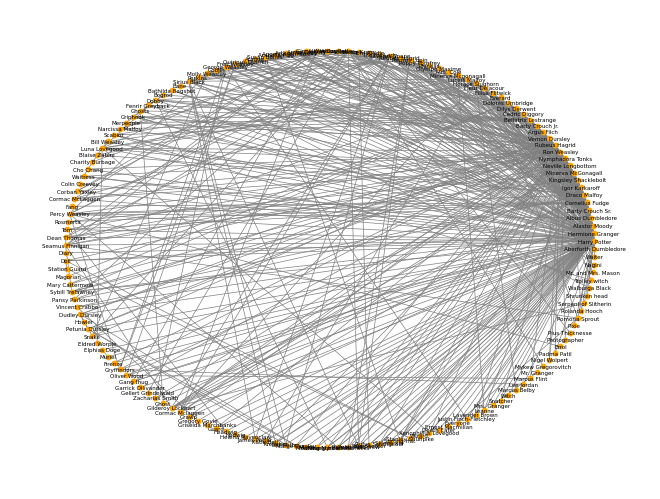

In [471]:
pos = nx.circular_layout(g)

# Set the minimum width for edges
min_width = 1

nx.draw(g, pos=pos, with_labels=True, node_size=10, font_size=4, node_color='orange', edge_color='grey', width=0.5,
        edge_cmap=plt.cm.Blues, edge_vmin=0.0, edge_vmax=1)

# Show the plot
plt.show()

## 3. Exploratory Data Analysis

In [472]:
def print_graph(g):
    '''function to print the nodes and edges of a graph g'''
    print('Number of nodes:', g.number_of_nodes())
    print('Number of edges:', g.number_of_edges())
    print('Average node degree:', 2 * g.number_of_edges() / g.number_of_nodes())
    
print_graph(G)
print_graph(g)

Number of nodes: 159
Number of edges: 826
Average node degree: 10.38993710691824
Number of nodes: 159
Number of edges: 509
Average node degree: 6.40251572327044


### 3.1. Network Diameter

In [473]:
# for small dataset
def get_network_diameters(g):
    
    # Step 1: construct a dictionary to hold all-pair distances
    all_pair = dict(nx.all_pairs_shortest_path_length(g))

    # Step 2: collecting all-pair shortest path distances in a list 
    values = []
    for source in all_pair.keys():
        for target in all_pair[source].keys():
            values.append(all_pair[source][target])
        
    # Step 3: use numpy to calculate network diameters
    d_avg = np.mean([v for v in values if v != 0]) # only keep non-zero distances 
    d_max = np.max(values)
    d_90th = np.percentile(values, 90)

    # return a triplet of the three diameters
    return (d_avg, d_max, d_90th)

d_avg, d_max, d_90th = get_network_diameters(g)
print(f'Diamter (avg): {d_avg:.2f}')
print(f'Diamter (max): {d_max:.2f}')
print(f'Diamter (90th): {d_90th:.2f}')


Diamter (avg): 2.41
Diamter (max): 5.00
Diamter (90th): 3.00


In [474]:
# for large dataset
def get_network_diameters_approx(g, num):
    values = []
    while len(values) < num:
        source = np.random.choice(g.nodes()) # randomly select a source node
        target = np.random.choice(g.nodes()) # randomly select a target node
        values.append(nx.shortest_path_length(g, source, target))

    d_avg = np.mean([v for v in values if v != 0]) # only keep non-zero distances 
    d_max = np.max(values)
    d_90th = np.percentile(values, 90)                  
    
    return (d_avg, d_max, d_90th) #smaple 1000 pairs only 

d_avg, d_max, d_90th = get_network_diameters_approx(g, 1000)
print(f'Diamter (avg): {d_avg:.2f}')
print(f'Diamter (max): {d_max:.2f}')
print(f'Diamter (90th): {d_90th:.2f}')


Diamter (avg): 2.42
Diamter (max): 4.00
Diamter (90th): 3.00


### 3.2. Degree Distribution


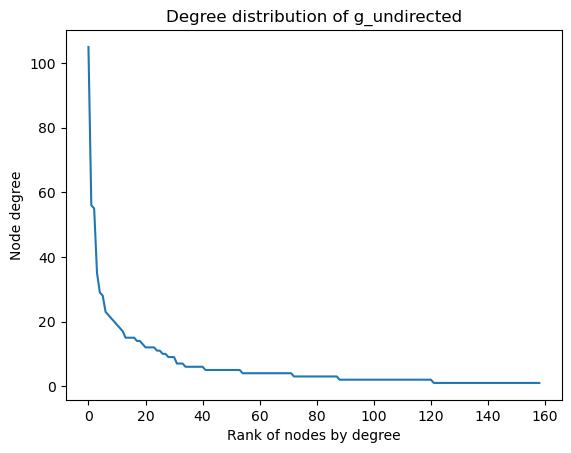

In [475]:
def plot_degree_dist(g, title):
    # sort the node degrees in descending order 
    degrees = sorted([g.degree(n) for n in g.nodes()], reverse=True)
    
    plt.title(title)
    plt.xlabel('Rank of nodes by degree')
    plt.ylabel('Node degree')
    plt.plot(degrees)
    plt.show()

plot_degree_dist(g,'Degree distribution of g_undirected')

### 3.3. Clustering co-efficient

In [476]:
# Global clustering coefficient is small
c_g = nx.transitivity(g)
print(f'c = {c_g:.3f}')

c = 0.175


In [477]:
df_g_sub = nx.to_pandas_edgelist(g)
df_g_sub

,source,target,weight
0,Aberforth Dumbledore,Harry Potter,29
1,Aberforth Dumbledore,Hermione Granger,8
2,Harry Potter,Alastor Moody,46
3,Harry Potter,Albus Dumbledore,362
4,Harry Potter,Albus Potter,12
...,...,...,...
504,Oliver Wood,Marcus Flint,4
505,Gilderoy Lockhart,Serpent of Slitherin,1
506,James Potter,Lily Potter,14
507,Everyone,Pomona Sprout,4


In [478]:
df_label = pd.read_excel(r'C:\Users\SunnyM\Downloads\cleaned_data.xlsx', sheet_name='labels')
df_label

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
0,1,Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather
1,2,Ron Weasley,Human,Male,Gryffindor,Jack Russell Terrier,NaN,NaN
2,3,Hermione Granger,Human,Female,Gryffindor,Otter,Vine,Dragon Heartstring
3,4,Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair
4,5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor,NaN,Oak,NaN
...,...,...,...,...,...,...,...,...
164,165,Gryffindors,NaN,NaN,Others,NaN,NaN,NaN
165,166,Professors,NaN,NaN,Others,NaN,NaN,NaN
166,167,Doll,NaN,NaN,Others,NaN,NaN,NaN
167,168,Hedwig,NaN,NaN,Others,NaN,NaN,NaN


In [479]:
df_label['House'].unique()

array(['Gryffindor', 'Slytherin', 'Others', 'Ravenclaw', 'Hufflepuff',
       'Beauxbatons Academy of Magic', 'Durmstrang Institute'],
      dtype=object)

In [480]:
Hogwarts_school = ['Gryffindor','Slytherin','Ravenclaw','Hufflepuff']

Hogwarts = list(df_label[df_label['House'].isin(Hogwarts_school)]['Character Name'])  

Others = list(df_label[~df_label['House'].isin(Hogwarts_school)]['Character Name'])  

In [481]:
Others

['Alastor Moody',
 'Cornelius Fudge',
 'Vernon Dursley',
 'Dobby',
 'Griphook',
 'Dudley Dursley',
 'Petunia Dursley',
 'Barty Crouch Sr.',
 'Xenophilius Lovegood',
 'Argus Filch',
 'Aberforth Dumbledore',
 'Kreacher',
 'Igor Karkaroff',
 'Rolanda Hooch',
 'Rufus Scrimgeour',
 'Kingsley Shacklebolt',
 'Rita Skeeter',
 'Stanley Shunpike',
 'Marge Dursley',
 'Elphias Doge',
 'Bogrod',
 'Rosmerta',
 'Amos Diggory',
 'Aragog',
 'Olympe Maxime',
 'Mundungus Fletcher',
 'Muriel',
 'Fleur Delacour',
 'Mary Cattermole',
 'Poppy Pomfrey',
 'Serpent of Slitherin',
 'Firenze',
 'Arabella Figg',
 'Barty Crouch Jr.',
 'Mrs. Cole',
 'Tom',
 'Grawp',
 'Mrs. Granger',
 'Pius Thicknesse',
 'Bane',
 'Gellert Grindelwald',
 'Fenrir Greyback',
 'Magorian',
 'Bathilda Bagshot',
 'Everard',
 'Griselda Marchbanks',
 'Mr. Granger',
 'Perkins',
 'Phineas',
 'Viktor Krum',
 'Charity Burbage',
 'Dilys Derwent',
 'Eldred Worple',
 'Mykew Gregorovitch',
 'Other',
 'Students',
 'Sorting Hat',
 'Ghosts',
 'Merpeople

In [482]:
df_Hogwarts = df_g_sub[df_g_sub['source'].isin(Hogwarts) & df_g_sub['target'].isin(Hogwarts)]

df_Others = df_g_sub[df_g_sub['source'].isin(Others) & df_g_sub['target'].isin(Others)]

In [483]:
# there is no interactions between 2 non-Hogwarts characters
df_Others

,source,target,weight
160,Alastor Moody,Barty Crouch Sr.,2
161,Alastor Moody,Cornelius Fudge,1
163,Alastor Moody,Igor Karkaroff,2
164,Alastor Moody,Kingsley Shacklebolt,3
170,Alastor Moody,Vernon Dursley,2
204,Barty Crouch Sr.,Barty Crouch Jr.,2
206,Barty Crouch Sr.,Igor Karkaroff,21
208,Barty Crouch Sr.,Viktor Krum,2
211,Cornelius Fudge,Arabella Figg,4
218,Cornelius Fudge,Rosmerta,13


In [484]:
# Higher clustering coeffient for characters in Hogwarts
g_Hogwarts  = nx.from_pandas_edgelist(df_Hogwarts, 
source = 'source', target = 'target', edge_attr = 'weight')
c_g_Hogwarts = nx.transitivity(g_Hogwarts)
print(f'c = {c_g_Hogwarts:.3f}')

c = 0.314


In [485]:
# Higher clustering coeffient for characters not in Hogwarts
g_Others  = nx.from_pandas_edgelist(df_Others, 
source = 'source', target = 'target', edge_attr = 'weight')
c_g_Others = nx.transitivity(g_Others)
print(f'c = {c_g_Others:.3f}')

c = 0.310


In [486]:
cc = pd.DataFrame({'Type': ['Global CC', 
                            'Local CC1', 'Local CC2'  ], 
                   'cc': [c_g, c_g_Hogwarts,c_g_Others]})

cc

,Type,cc
0,Global CC,0.174712
1,Local CC1,0.314126
2,Local CC2,0.310345


Text(0.5, 1.0, 'Gloabl and Local Clustering Coefficient')

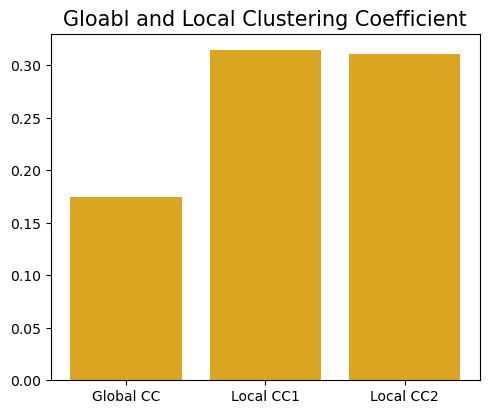

In [487]:
fig2,(ax) = plt.subplots(figsize=(5,4), ncols=1)
plt.bar(cc['Type'], cc['cc'], color = ['goldenrod'])
fig2.tight_layout()
plt.title('Gloabl and Local Clustering Coefficient', fontsize=15)

# 4. Network Influence

In [488]:
# Compute the in-degree centrality for nodes
degree = nx.in_degree_centrality(G)

# weighted
# closeness distance function computes the incoming distance to u for directed graphs. To use outward distance, act on G.reverse().
# for directed graphs this is “left” eigenvector centrality which corresponds to the in-edges in the graph. For out-edges eigenvector centrality first reverse the graph with G.reverse().

closeness_w = nx.closeness_centrality(g, distance = 'weight')
betweenness_w = nx.betweenness_centrality(g, weight = 'weight')
eigenvector_w = nx.eigenvector_centrality(g, weight = 'weight')

# print out various centrality measures
print('Node             \tDeg\tCloW\tBetW\tEigW')
for n in G.nodes():
    print(f'{n:20}\t{degree[n]:.3f}\t{closeness_w[n]:.3f}\t{betweenness_w[n]:.3f}\t{eigenvector_w[n]:.3f}')
    
    

Node             	Deg	CloW	BetW	EigW
Aberforth Dumbledore	0.013	0.080	0.000	0.016
Harry Potter        	0.627	0.216	0.268	0.647
Hermione Granger    	0.297	0.221	0.240	0.513
Alastor Moody       	0.076	0.188	0.024	0.028
Albus Dumbledore    	0.184	0.199	0.114	0.175
Barty Crouch Sr.    	0.044	0.196	0.018	0.006
Cornelius Fudge     	0.063	0.198	0.048	0.021
Draco Malfoy        	0.165	0.231	0.193	0.040
Igor Karkaroff      	0.019	0.157	0.001	0.001
Kingsley Shacklebolt	0.025	0.132	0.000	0.003
Minerva McGonagall  	0.089	0.177	0.008	0.044
Neville Longbottom  	0.120	0.202	0.041	0.043
Nymphadora Tonks    	0.019	0.190	0.000	0.002
Ron Weasley         	0.316	0.214	0.157	0.493
Rubeus Hagrid       	0.139	0.202	0.119	0.114
Vernon Dursley      	0.038	0.166	0.018	0.027
Argus Filch         	0.044	0.190	0.021	0.008
Barty Crouch Jr.    	0.019	0.141	0.000	0.001
Bellatrix Lestrange 	0.101	0.170	0.019	0.012
Cedric Diggory      	0.019	0.192	0.027	0.017
Dilys Derwent       	0.006	0.143	0.000	0.000
Dolores Umbridge  

In [489]:
# find the top 5 charaters with high in_degree centrality
degree_top = sorted(degree.items(), key=lambda item: item[1], reverse=True)[:10]
degree_top

[('Harry Potter', 0.6265822784810127),
 ('Ron Weasley', 0.31645569620253167),
 ('Hermione Granger', 0.2974683544303797),
 ('Albus Dumbledore', 0.18354430379746836),
 ('Draco Malfoy', 0.16455696202531644),
 ('Rubeus Hagrid', 0.13924050632911392),
 ('Severus Snape', 0.12658227848101267),
 ('Neville Longbottom', 0.12025316455696203),
 ('Voldemort', 0.11392405063291139),
 ('Bellatrix Lestrange', 0.10126582278481013)]

In [490]:
# find the top 5 charaters with high closeness centrality
# closeness distance function computes the incoming distance to u for directed graphs
closeness_w_top = sorted(closeness_w.items(), key=lambda item: item[1], reverse=True)[:10]
closeness_w_top

#Filius Flitwick

[('Draco Malfoy', 0.2309941520467836),
 ('Hermione Granger', 0.22128851540616246),
 ('Sorting Hat', 0.21703296703296704),
 ('Harry Potter', 0.21643835616438356),
 ('Filius Flitwick', 0.21496598639455783),
 ('Ron Weasley', 0.21438263229308005),
 ('Poppy Pomfrey', 0.2140921409214092),
 ('Ginny Weasley', 0.2098273572377158),
 ('Gryffindors', 0.20954907161803712),
 ('Arthur Weasley', 0.20816864295125165)]

In [491]:
# find the top 5 charaters with high betweenness centrality
betweenness_w_top = sorted(betweenness_w.items(), key=lambda item: item[1], reverse=True)[:10]
betweenness_w_top

[('Harry Potter', 0.26810787372123346),
 ('Hermione Granger', 0.2398178739328919),
 ('Draco Malfoy', 0.19273143880006569),
 ('Ron Weasley', 0.15659357335995103),
 ('Rubeus Hagrid', 0.11930663292470928),
 ('Albus Dumbledore', 0.11396803360630889),
 ('Ginny Weasley', 0.08441326291994526),
 ('Voldemort', 0.06998945539218053),
 ('Sorting Hat', 0.06559472933206476),
 ('Arthur Weasley', 0.06198010169709313)]

In [492]:
# find the top 5 charaters with high betweenness centrality
eigenvector_w_top = sorted(eigenvector_w.items(), key=lambda item: item[1], reverse=True)[:10]
eigenvector_w_top

[('Harry Potter', 0.6473711987351299),
 ('Hermione Granger', 0.5130749457041047),
 ('Ron Weasley', 0.49303876885344794),
 ('Albus Dumbledore', 0.1754627807945432),
 ('Rubeus Hagrid', 0.11380400492464522),
 ('Severus Snape', 0.059572312867199405),
 ('Horace Slughorn', 0.058046638941616414),
 ('Remus Lupin', 0.0526990641899509),
 ('Sirius Black', 0.049084108074249254),
 ('Minerva McGonagall', 0.04394484832630729)]

In [493]:
#he PageRank algorithm was designed for directed graphs
pagerank = nx.pagerank(g, weight='weight')

# printout pagerank
for n in g:
    print('{:20s} {:3f}'.format(n, pagerank[n]))

Aberforth Dumbledore 0.002929
Harry Potter         0.263241
Hermione Granger     0.090292
Alastor Moody        0.007504
Albus Dumbledore     0.050722
Barty Crouch Sr.     0.005008
Cornelius Fudge      0.011022
Draco Malfoy         0.014803
Igor Karkaroff       0.003073
Kingsley Shacklebolt 0.002137
Minerva McGonagall   0.012138
Neville Longbottom   0.012451
Nymphadora Tonks     0.001802
Ron Weasley          0.089089
Rubeus Hagrid        0.025374
Vernon Dursley       0.008861
Argus Filch          0.003388
Barty Crouch Jr.     0.001727
Bellatrix Lestrange  0.009672
Cedric Diggory       0.003353
Dilys Derwent        0.001055
Dolores Umbridge     0.009151
Everard              0.001390
Filius Flitwick      0.002276
Fleur Delacour       0.001544
Horace Slughorn      0.015266
Lucius Malfoy        0.007837
Minerva Mcgonagall   0.001714
Mrs. Cole            0.001444
Olympe Maxime        0.001714
Phineas              0.001167
Poppy Pomfrey        0.001454
Remus Lupin          0.011597
Reubus Hag

In [494]:
# find the top 5 charaters with high pagerank centrality
pagerank_top = sorted(pagerank.items(), key=lambda item: item[1], reverse=True)[:10]
pagerank_top

[('Harry Potter', 0.2632405159080068),
 ('Hermione Granger', 0.09029197850594177),
 ('Ron Weasley', 0.08908898385197576),
 ('Albus Dumbledore', 0.05072199260803973),
 ('Rubeus Hagrid', 0.025373658546149553),
 ('Severus Snape', 0.021215418815056668),
 ('Horace Slughorn', 0.015266154910286519),
 ('Voldemort', 0.015044467423280026),
 ('Draco Malfoy', 0.014803125377763158),
 ('Neville Longbottom', 0.012451494331619089)]

## 5. Community Detection

### Modularity-based agglomerative algorithm

In [495]:
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(g)
for c in communities:
    print(sorted(c))

['Alecto Carrow', 'Angelina Johnson', 'Blaise Zabini', 'Cho Chang', 'Cormac McLaggen', 'Cormac Mclaggen', 'Dean Thomas', 'Death Eater', 'Draco Malfoy', 'Eldred Worple', 'Ernest Macmillan', 'Everyone', 'Filius Flitwick', 'Gang thug', 'Ginny Weasley', 'Gregory Goyle', 'Hermione Granger', 'Horace Slughorn', 'Lavender Brown', 'Luna Lovegood', 'Marcus Belby', 'Mr. Granger', 'Mrs. Granger', 'Mundungus Fletcher', 'Neville Longbottom', 'Nigel Wolpert', 'Photographer', 'Pomona Sprout', 'Poppy Pomfrey', 'Ron Weasley', 'Rufus Scrimgeour', 'Seamus Finnigan', 'Snatcher', 'Sorting Hat', 'Sybill Trelawney', 'Vincent Crabbe', 'Waitress', 'Witch', 'Xenophilius Lovegood']
['Aberforth Dumbledore', 'Albus Potter', 'Bathilda Bagshot', 'Bill Weasley', 'Colin Creevey', 'Diary', 'Elphias Doge', 'Fleur Delacour', 'Garrick Ollivander', 'Griselda Marchbanks', 'Guard', 'Harry Potter', 'Headwig', 'Hedwig', 'Helena Ravenclaw', 'James Potter', 'Katie Bell', 'Kingsley Shacklebolt', 'Kreacher', 'Lily Potter', 'Mirror'

### Centrality-based divisive algorithm

In [496]:
from networkx.algorithms.community import girvan_newman

iter = girvan_newman(g)
for i in iter:
    # stopping condition: when we have 2 communities
    if len(i) == 5:
        for c in i:
            print(sorted(c))
        break

['Aberforth Dumbledore', 'Alastor Moody', 'Albus Dumbledore', 'Alecto Carrow', 'Amos Diggory', 'Angelina Johnson', 'Arabella Figg', 'Aragog', 'Argus Filch', 'Arthur Weasley', 'Bane', 'Barty Crouch Jr.', 'Barty Crouch Sr.', 'Bathilda Bagshot', 'Bellatrix Lestrange', 'Bill Weasley', 'Blaise Zabini', 'Bogrod', 'Cedric Diggory', 'Charity Burbage', 'Cho Chang', 'Colin Creevey', 'Corban Yaxley', 'Cormac McLaggen', 'Cormac Mclaggen', 'Cornelius Fudge', 'Dean Thomas', 'Death Eater', 'Diary', 'Dilys Derwent', 'Dobby', 'Dolores Umbridge', 'Draco Malfoy', 'Eldred Worple', 'Elphias Doge', 'Ernest Macmillan', 'Errol', 'Everard', 'Everyone', 'Fang', 'Fenrir Greyback', 'Filius Flitwick', 'Firenze', 'Fleur Delacour', 'Fred Weasley', 'Gang thug', 'Garrick Ollivander', 'Gellert Grindelwald', 'George Weasley', 'Ghost', 'Ghosts', 'Gilderoy Lockhart', 'Ginny Weasley', 'Goblin', 'Grawp', 'Gregory Goyle', 'Griphook', 'Griselda Marchbanks', 'Gryffindors', 'Guard', 'Harry Potter', 'Headwig', 'Hedwig', 'Helena 

## 6. Social Similarites

In [497]:
nodes = list(g.nodes)
nodes

['Aberforth Dumbledore',
 'Harry Potter',
 'Hermione Granger',
 'Alastor Moody',
 'Albus Dumbledore',
 'Barty Crouch Sr.',
 'Cornelius Fudge',
 'Draco Malfoy',
 'Igor Karkaroff',
 'Kingsley Shacklebolt',
 'Minerva McGonagall',
 'Neville Longbottom',
 'Nymphadora Tonks',
 'Ron Weasley',
 'Rubeus Hagrid',
 'Vernon Dursley',
 'Argus Filch',
 'Barty Crouch Jr.',
 'Bellatrix Lestrange',
 'Cedric Diggory',
 'Dilys Derwent',
 'Dolores Umbridge',
 'Everard',
 'Filius Flitwick',
 'Fleur Delacour',
 'Horace Slughorn',
 'Lucius Malfoy',
 'Minerva Mcgonagall',
 'Mrs. Cole',
 'Olympe Maxime',
 'Phineas',
 'Poppy Pomfrey',
 'Remus Lupin',
 'Reubus Hagrid',
 'Severus Snape',
 'The Fat Lady',
 'Tom Riddle',
 'Viktor Krum',
 'Voldemort',
 'Albus Potter',
 'Alecto Carrow',
 'Ginny Weasley',
 'Amos Diggory',
 'Arthur Weasley',
 'Angelina Johnson',
 'Arabella Figg',
 'Susan Bones',
 'Aragog',
 'Quirinus Quirrell',
 'Fred Weasley',
 'George Weasley',
 'Goblin',
 'Molly Weasley',
 'Perkins',
 'Sirius Black'

In [498]:
# construct a dictionary to store the similarities, where each user is a key
target = ['Harry Potter', 'Voldemort']

jacc = dict()

for a in target:
    jacc[a] = dict() # create a nested dictionary for each user/query
    for b in nodes:
        results = nx.jaccard_coefficient(g, [(a, b)])  
        jacc[a][b] = next(results)[2]  
        # the function returns an iterator of (a,b,s) triplets, where s is the score between nodes a and b
        # therefore, we need to call next() and access with index 2
        
# print out the pairwise Jaccard similarity scores


Text(0.5, 1.0, 'Top 10 Similarity to Harry Potter')

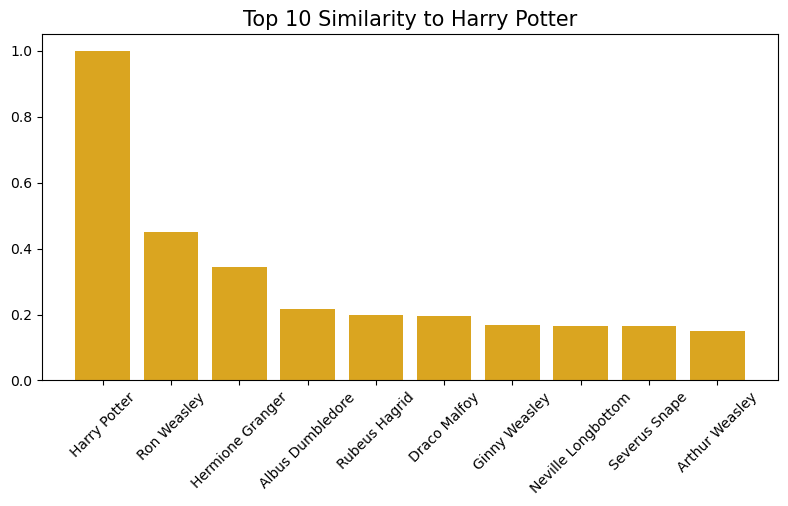

In [509]:
Harry_sim = pd.DataFrame.from_dict(jacc['Harry Potter'], orient='index', columns=['Similarity'])

Harry_sim = Harry_sim.sort_values(by=['Similarity'], ascending=False).head(10)
fig1,(ax) = plt.subplots(figsize=(8,4), ncols=1)
plt.bar(Harry_sim.index,Harry_sim['Similarity'], color=['goldenrod'])
fig1.tight_layout()
plt.xticks(rotation=45)
plt.title('Top 10 Similarity to Harry Potter', fontsize=15)

Text(0.5, 1.0, 'Top 10 Similarity to Voldemort')

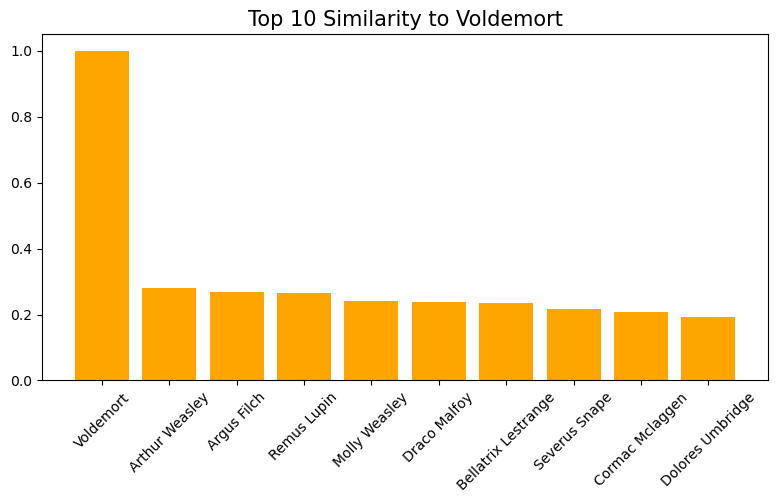

In [508]:
Voldemort_sim = pd.DataFrame.from_dict(jacc['Voldemort'], orient='index', columns=['Similarity'])
Voldemort_sim = Voldemort_sim.sort_values(by=['Similarity'], ascending=False).iloc[0:10]
fig,(ax) = plt.subplots(figsize=(8,4), ncols=1)
plt.bar(Voldemort_sim.index,Voldemort_sim['Similarity'], color=['orange'])
fig.tight_layout()
plt.xticks(rotation=45)
plt.title('Top 10 Similarity to Voldemort',fontsize=15)

In [ ]:
simrank = nx.simrank_similarity(g, importance_factor = 0.85)

simrank['Harry Potter']['Ron Weasley']